# Figures 4, S1 and S2: Depth-Integrated Ocean Heat Content trends

This notebook will reproduce Figure 4 from *Ocean Heat Content responses to changing Anthropogenic Aerosol Forcing Strength: regional and multi-decadal variability*, E. Boland et al. 2022 (doi to come), as well as figures S1 and S2 from the supplementary info. This will require utils.py (expects to find it in ../code) and input datafiles (expects to find them in ../data_in) to run - please see the README for details.

The data files loaded were created as follows:
- Time series of depth-integrated OHC for the SMURPHS ensemble and the pre-industrial control were generated by running ohc_xy.py and ohc_xy_pic.py
- PIC drift was calculated in ohc_xy_pic_drift.py
- 30 year trends were calculated, de-drifted, then regridded to 1x1 deg in ohc_xy_trends.py, producing ohc_xy_trend_regrid_by_run\_\[ystart\]\[yend\].nc

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Feb 2022 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

In [2]:
# Directories for saving plots and finding input data
figs_dir = '../figs/' # Where you want the plots saved
data_dir='../data_in/' # Where the input data is (see README)

# Experiment info, don't alter
exps=['historical0p2','historical0p4','historical0p7','historical1p0','historical1p5']
runs=['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1']
exp_names=['0.2','0.4','0.7','1.0','1.5']
y_start=[1960,1980]
y_end=[1991,2011]

In [3]:
ohu_xy=[]
for tchunk in range(0,2):
    ohc_runs=xr.open_dataarray(data_dir+'ohc_xy/ohc_xy_trend_regrid_byrun_'+str(y_start[tchunk])+str(y_end[tchunk])+'.nc')
    ohu_xy.append(ohc_runs)
ohu_xy=xr.concat(ohu_xy,'time')

In [8]:
# Plotting choices
atllims=[-60,0,35,70]
solims=[-90,-30]
atl_inds=(ohu_xy.lon>atllims[0])&(ohu_xy.lon<atllims[1])&(ohu_xy.lat>atllims[2])&(ohu_xy.lat<atllims[3])
so_inds=(ohu_xy.lat>solims[0])&(ohu_xy.lat<solims[1])
region_dict={'atl':{'inds':[atl_inds],'proj':ccrs.Orthographic(),'lims':atllims,'figsize':[8,6]},
            'so':{'inds':[so_inds],'proj':ccrs.SouthPolarStereo(),'lims':[-180,180,-90,-25],'figsize':[8,8]},
            'global':{'inds':None,'proj':ccrs.Robinson(central_longitude=-100),'lims':None,'figsize':[16,6]}}

## Figure 4

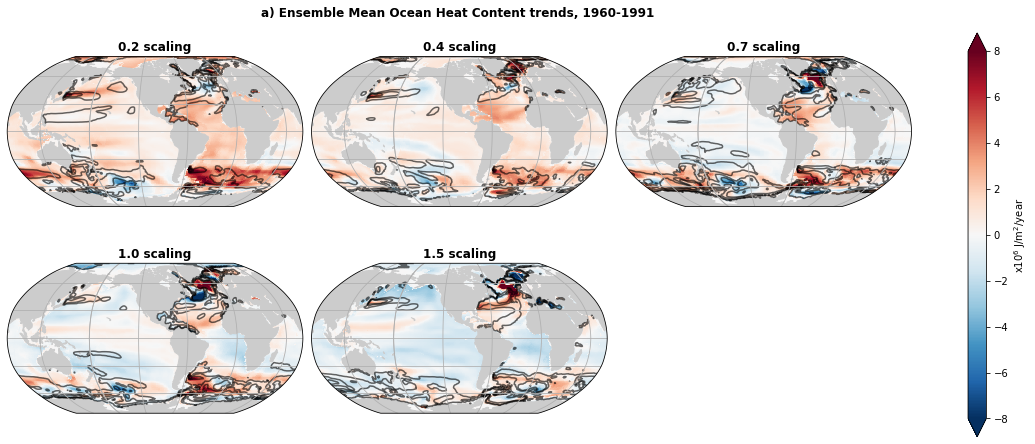

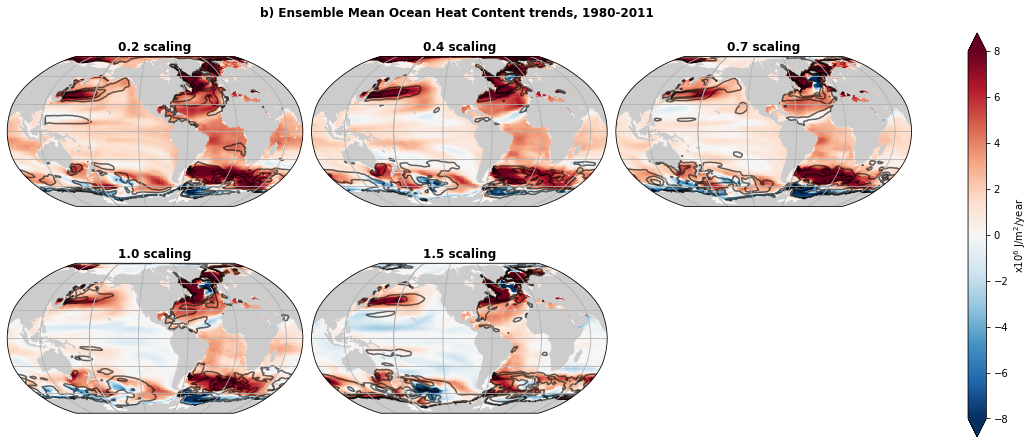

In [6]:
%matplotlib inline
region='global'

for tchunk in range(0,2):
    dplot=ohu_xy.isel(time=tchunk)/1e7*12
    if region_dict[region]['inds']:
        dplot=dplot.where(region_dict[region]['inds'][0],drop=True)

    dplot_mean=dplot.mean(dim='run')
    dplot_std=dplot.std(dim='run')
    p=dplot_mean.plot(x='lon',y='lat',col='exp',col_wrap=3,transform=ccrs.PlateCarree(), 
                    figsize=region_dict[region]['figsize'],cmap='RdBu_r',
                      vmin=-8,vmax=8,
                    subplot_kws={'projection': region_dict[region]['proj']},cbar_kwargs={'label': 'x10$^7$ J/m$^2$/year'},rasterized=True)  
    for ia,ax in enumerate(p.axes.flat):
        ax.add_feature(cf.LAND,color=[0.8,0.8,0.8],zorder=1)
        ax.gridlines()
        if region_dict[region]['lims']:
            ax.set_extent(region_dict[region]['lims'], ccrs.PlateCarree())
        if ia<5:               
            dplot_std.isel(exp=ia).plot.contour(x='lon',y='lat',levels=[2,4,6],colors='k',alpha=0.6,transform=ccrs.PlateCarree(),ax=ax)            
            ax.set_title(exp_names[ia]+' scaling',fontweight='bold')      
    plt.suptitle(chr(ord('a')+tchunk)+') Ensemble Mean Ocean Heat Content trends, '+str(y_start[tchunk])+'-'+str(y_end[tchunk]),weight='bold',x=0.4,y=1.02)
    plt.savefig(figs_dir+'Fig4_ohu_xy_runmean_'+region+'_'+str(y_start[tchunk])+str(y_end[tchunk])+'.png',bbox_inches='tight')

## Figures S1 and S2

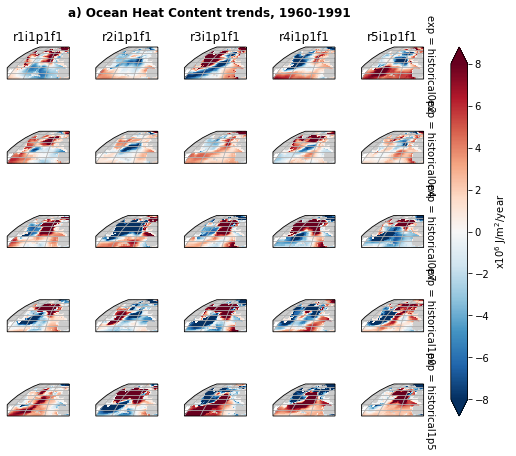

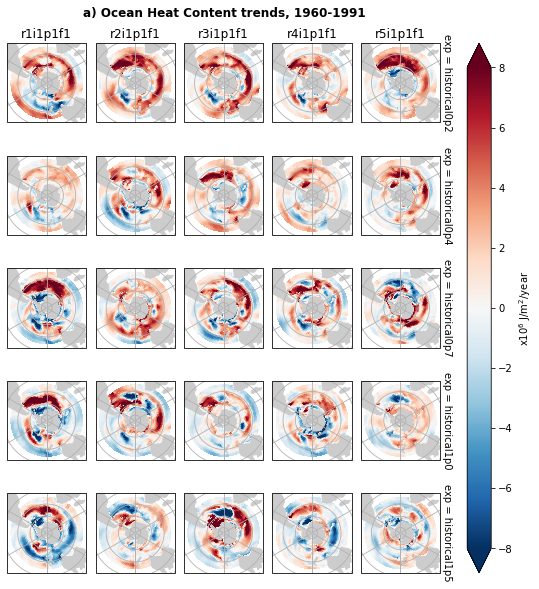

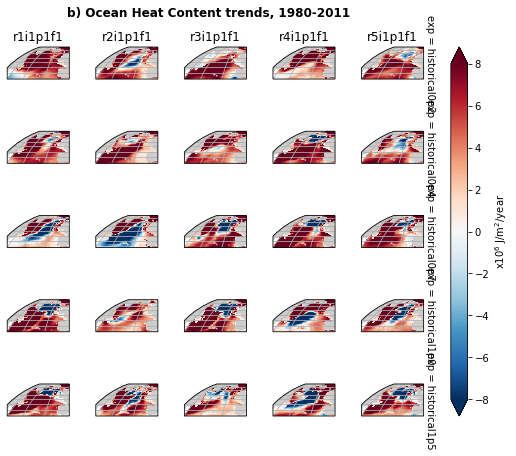

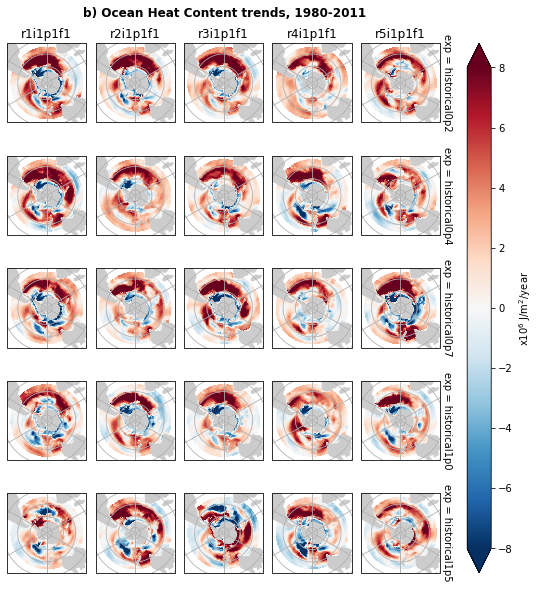

In [9]:
%matplotlib inline
for tchunk in range(0,2):
    for region in ['atl','so']: 

        dplot=ohu_xy.isel(time=tchunk)/1e6
        dplot=dplot.where(region_dict[region]['inds'][0],drop=True)

        p=dplot.plot(x='lon',y='lat',col='run',row='exp',transform=ccrs.PlateCarree(), 
                        figsize=region_dict[region]['figsize'],
                     cmap='RdBu_r',
                          vmin=-8,vmax=8,
                        subplot_kws={'projection': region_dict[region]['proj']},cbar_kwargs={'label': 'x10$^6$ J/m$^2$/year'},rasterized=True)  
        p.set_ylabels(exp_names)
        for ia,ax in enumerate(p.axes.flat):
            ax.add_feature(cf.LAND,color=[0.8,0.8,0.8],zorder=1)
            ax.gridlines()
            if ia<5:
                ax.set_title(runs[ia])
            if region_dict[region]['lims']:
                ax.set_extent(region_dict[region]['lims'], ccrs.PlateCarree())   
        plt.suptitle(chr(ord('a')+tchunk)+') Ocean Heat Content trends, '+str(y_start[tchunk])+'-'+str(y_end[tchunk]),weight='bold',x=0.4,y=1.02)
        plt.savefig(figs_dir+'SIFig_ohu_xy_byrun_'+region+'_'+str(y_start[tchunk])+str(y_end[tchunk])+'.png',bbox_inches='tight')